Code to create a filtered and balanced HAM10000 dataset

In [1]:
import os
import pandas as pd
import shutil
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Paths
image_dir = 'C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000 dataset/combined'
metadata_file = 'C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000 dataset/Data/HAM10000_metadata.csv'
output_dir = 'C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000_balanced_nv_mel_equal_gender'
filtered_metadata_file = os.path.join(output_dir, 'HAM10000_filtered_metadata.csv')

In [3]:
# creating output directories
benign_dir = os.path.join(output_dir, 'Benign')
malignant_dir = os.path.join(output_dir, 'Malignant')
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

metadata = pd.read_csv(metadata_file)

# delete rows if sex == 'unknown'
metadata = metadata[metadata['sex'] != 'unknown']

# Filter the 'nv' and 'mel' rows
nv_images = metadata[metadata['dx'] == 'nv']
mel_images = metadata[metadata['dx'] == 'mel']

# equal amount of images for male and female images
nv_min_gender_count = min(len(nv_images[nv_images['sex'] == 'female']), len(nv_images[nv_images['sex'] == 'male']))
mel_min_gender_count = min(len(mel_images[mel_images['sex'] == 'female']), len(mel_images[mel_images['sex'] == 'male']))

final_min_count = min(nv_min_gender_count, mel_min_gender_count)

# Balance each gender for each class
nv_balanced = pd.concat([
    nv_images[nv_images['sex'] == 'female'].sample(n=final_min_count, random_state=42),
    nv_images[nv_images['sex'] == 'male'].sample(n=final_min_count, random_state=42)
])

mel_balanced = pd.concat([
    mel_images[mel_images['sex'] == 'female'].sample(n=final_min_count, random_state=42),
    mel_images[mel_images['sex'] == 'male'].sample(n=final_min_count, random_state=42)
])

# Save balanced metadata 
balanced_metadata = pd.concat([nv_balanced, mel_balanced])

# Copy to their folders
for index, row in balanced_metadata.iterrows():
    image_id = row['image_id'] + '.jpg'  
    image_path = os.path.join(image_dir, image_id)

    
    if os.path.exists(image_path):
        if row['dx'] == 'nv':
            
            shutil.copy(image_path, benign_dir)
        elif row['dx'] == 'mel':
            
            shutil.copy(image_path, malignant_dir)

# Save bakanced metadata as CSV
balanced_metadata.to_csv(filtered_metadata_file, index=False)
print(f"Images are saved and balanced")
print(f"Filtered metadata saved in {filtered_metadata_file}")

Images are saved and balanced
Filtered metadata saved in C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000_balanced_nv_mel_equal_gender\HAM10000_filtered_metadata.csv


In [4]:
# Count total images in each folder
benign_count = len(os.listdir(benign_dir))
malignant_count = len(os.listdir(malignant_dir))

print(f"Total images in Benign class: {benign_count}")
print(f"Total images in Malignant class: {malignant_count}")

# Controleer dat beide klassen gelijk zijn
assert benign_count == malignant_count, "Total images in Benign and Malignant classes not equal"

Total images in Benign class: 848
Total images in Malignant class: 848


In [5]:
# Paths to the new balanced folders
benign_dir = 'C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000_balanced_nv_mel_equal_gender/Benign'
malignant_dir = 'C:/Desktop Oud/tilburg/leerjaar 4/Thesis/HAM10000_balanced_nv_mel_equal_gender/Malignant'

# Count again
benign_count = len(os.listdir(benign_dir))
malignant_count = len(os.listdir(malignant_dir))

print(f"Total images in Benign class: {benign_count}")
print(f"Total images in Malignant class: {malignant_count}")


Total images in Benign class: 848
Total images in Malignant class: 848


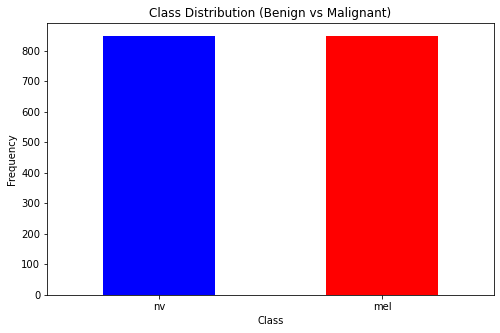

In [7]:
# Plot for new balanced data
class_counts = balanced_metadata['dx'].value_counts()
plt.figure(figsize=(8, 5))
class_counts.plot(kind='bar', color=['blue', 'red'])
plt.title("Class Distribution (Benign vs Malignant)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

Total images for each class and gender:
sex  female  male
dx               
mel     424   424
nv      424   424


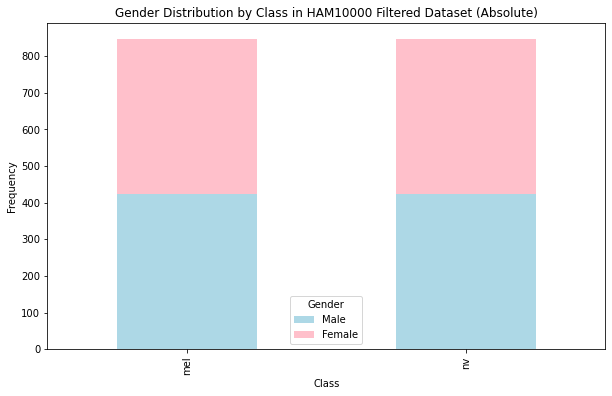


Percentage for each class and gender:
sex  female  male
dx               
mel    50.0  50.0
nv     50.0  50.0


In [10]:
# Gender distribution for male and female
gender_class_counts = balanced_metadata.groupby(['dx', 'sex']).size().unstack(fill_value=0)
print("Total images for each class and gender:")
print(gender_class_counts)

# Plot
gender_class_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['lightblue', 'pink'])
plt.title("Gender Distribution by Class in HAM10000 Filtered Dataset (Absolute)")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.legend(title="Gender", labels=["Male", "Female"])
plt.show()

# Percentages for each gender for each class
gender_percentage = gender_class_counts.div(gender_class_counts.sum(axis=1), axis=0) * 100
print("\nPercentage for each class and gender:")
print(gender_percentage)
